## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
data = pd.read_csv('Telecom_customer_churn.csv')

In [3]:
# Top 5 rows of dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA and Feature Engineering

In [4]:
# Dimensions of dataset
data.shape

(7043, 21)

There are 7043 rows and 21 columns are present in dataset.

In [5]:
# Datatypes in dataset
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are 18 columns are object type datatype, one column is float64 type and 2 columns are int64 datatypes are present in dataset.

In [6]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
153.3       1
531.55      1
4014.2      1
5082.8      1
5794.45     1
Name: TotalCharges, Length: 6531, dtype: int64

Data in column 'TotalCharges' are float type but it shows object type, because 11 blank spaces ' '  are pesent in this column.

In [9]:
# Check blank spaces in dataset
data.isin([' ']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total 11 blank spaces are present in column 'TotalCharges' as shown above.

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

Replaced blank values with nan

In [11]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

Converted the object to float datatype of column 'TotalCharges'.

In [12]:
# Imputing null values
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

Replaced the null values with the mean values.

In [13]:
# Checking the missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now, there are no missing values.

In [14]:
# Statistical information
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Observations:
    
(1). The mean is more the median for SeniorCitizen, tenure and TotalCharges.

(2). The large difference between 75% and max for MonthlyCharges and TotalCharges.

In [15]:
# Exploring Target variable
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Data Visualization

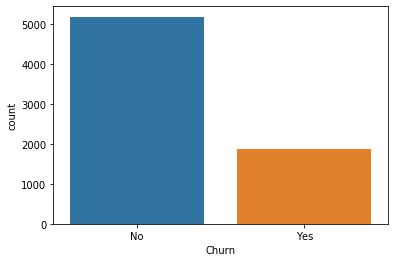

In [16]:
sns.countplot(data['Churn'])

'Churn' [target vaiable] column is imbalanced we need to balanced it.

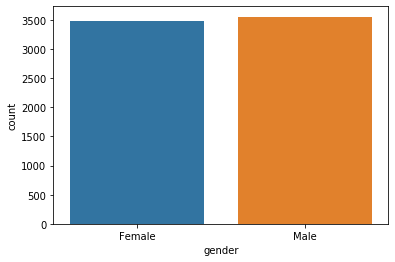

In [17]:
sns.countplot(data['gender'])

Count of gender is almost same.

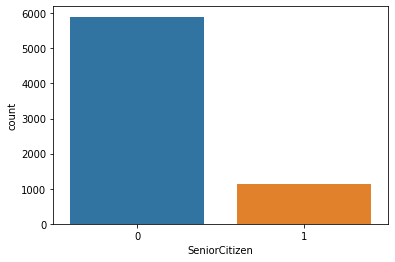

In [18]:
sns.countplot(data['SeniorCitizen'])

There are less No. of Senior Citizens.

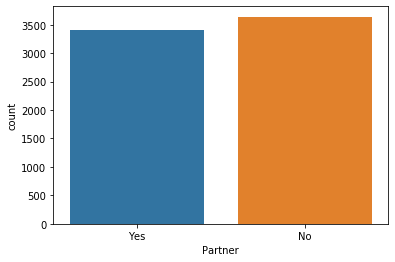

In [19]:
sns.countplot(data['Partner'])

There are Maximum people with no Partners.

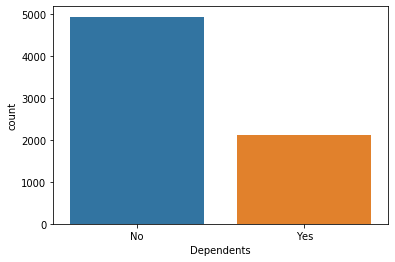

In [20]:
sns.countplot(data['Dependents'])

There are Maximum people with no Dependents.

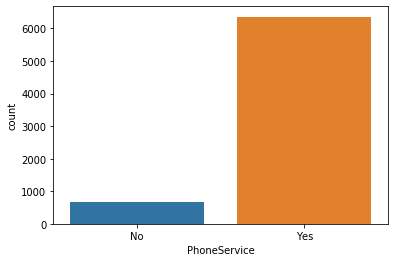

In [21]:
sns.countplot(data['PhoneService'])

Maximum No. of people having Phone Service.

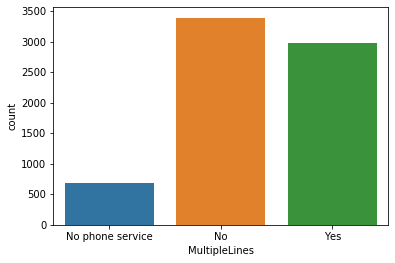

In [22]:
sns.countplot(data['MultipleLines'])

Maximum people do not have Multiple Lines.

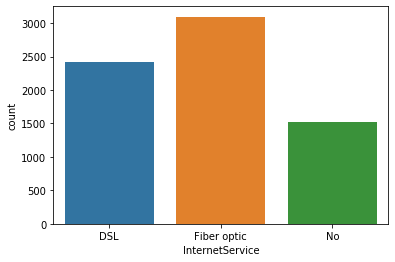

In [23]:
sns.countplot(data['InternetService'])

Maximum No. of people having Fibreoptic Internet Service.

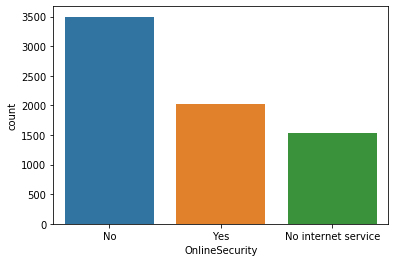

In [24]:
sns.countplot(data['OnlineSecurity'])

Maximum people does not have Online Security.

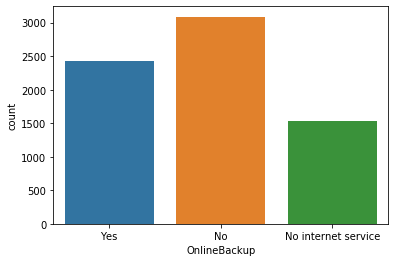

In [25]:
sns.countplot(data['OnlineBackup'])

Maximum people does not have Online Backup.

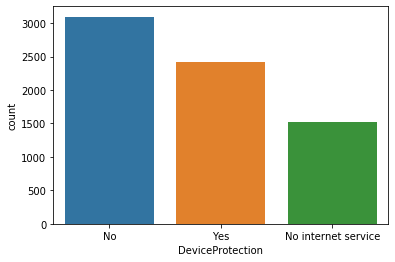

In [26]:
sns.countplot(data['DeviceProtection'])

Maximum people does not have Device Protection.

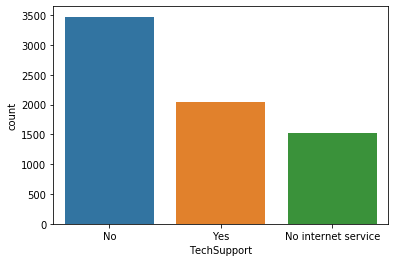

In [27]:
sns.countplot(data['TechSupport'])

Maximum people does not have Tech Support.

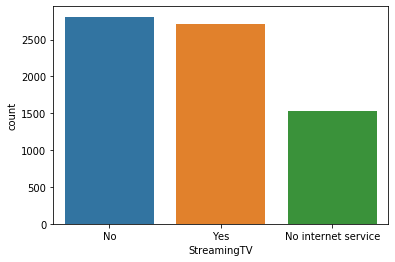

In [28]:
sns.countplot(data['StreamingTV'])

Maximum people does not have StreamingTV.

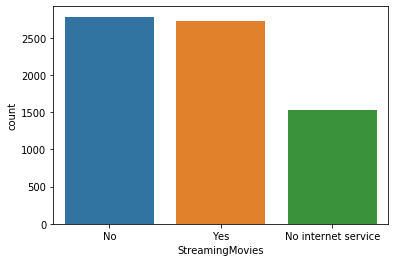

In [29]:
sns.countplot(data['StreamingMovies'])

Maximum people does not have Streaming Movies.

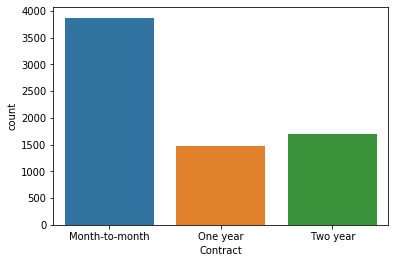

In [30]:
sns.countplot(data['Contract'])

Maximum people have month to month contract.

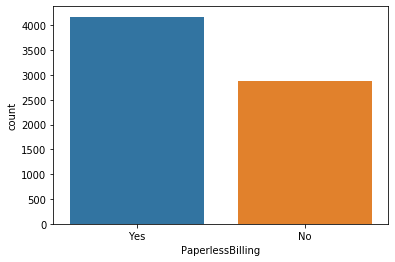

In [31]:
sns.countplot(data['PaperlessBilling'])

Maximum people do have Paperless Billing.

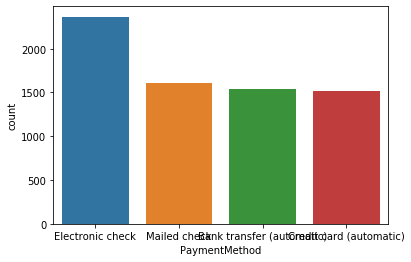

In [32]:
sns.countplot(data['PaymentMethod'])

Maximum people have electronic check.

In [33]:
a = data.describe(include=['O']).columns

saving the object datatypes in a variable.

In [34]:
for i in a:
    print(i)
    print(data[i].value_counts())
    print('\n')

customerID
0687-ZVTHB    1
3319-DWOEP    1
3799-ISUZQ    1
2186-QZEYA    1
9805-FILKB    1
             ..
1897-OKVMW    1
8295-KMENE    1
4074-SJFFA    1
2665-NPTGL    1
9702-AIUJO    1
Name: customerID, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: gender, dtype: int64


Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype:

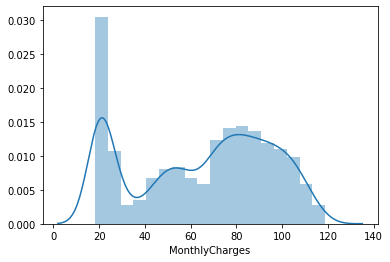

In [35]:
sns.distplot(data['MonthlyCharges'])

Grap is skewed.

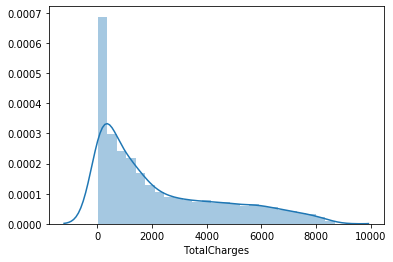

In [36]:
sns.distplot(data['TotalCharges'])

Grap is skewed.

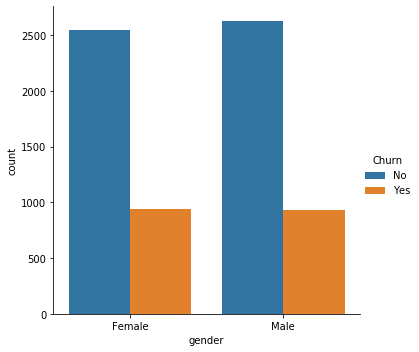

In [37]:
sns.catplot(x='gender', hue='Churn', kind='count', data=data)

The Churn ratio in both the gender is aslmost similar.

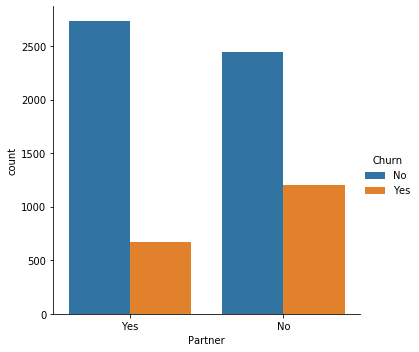

In [38]:
sns.catplot(x='Partner', hue='Churn', kind='count', data=data)

Maximum Customers with partner does not have Churn, whereas Customers with no parteners have high churn.

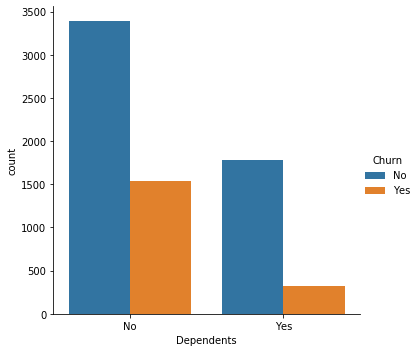

In [39]:
sns.catplot(x='Dependents', hue='Churn', kind='count', data=data)

Customers with no dependents have no churn.

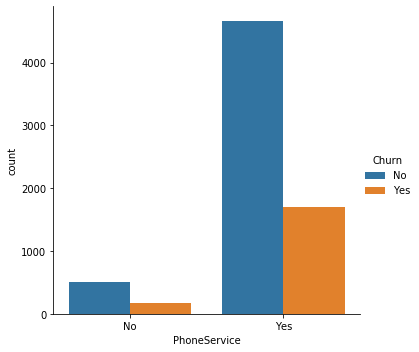

In [40]:
sns.catplot(x='PhoneService', hue='Churn', kind='count', data=data)

Customers with no Phone Service have no churn.

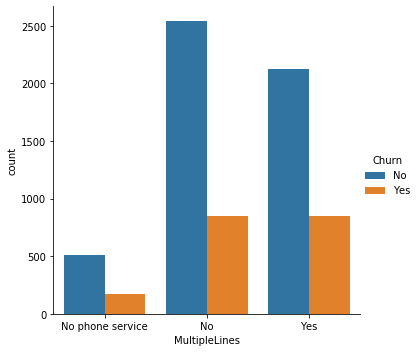

In [41]:
sns.catplot(x='MultipleLines', hue='Churn', kind='count', data=data)

Customers with  mutliple lines services have lowest churn.

Customers with multiple lines services have lower churn rate than customers with no phone service.

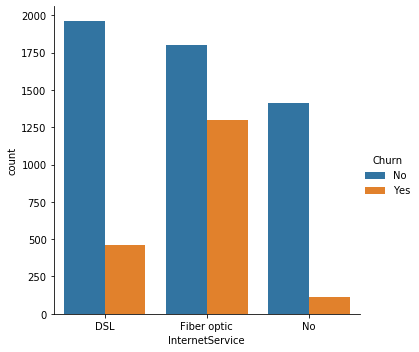

In [42]:
sns.catplot(x='InternetService', hue='Churn', kind='count', data=data)

Customers with DSL internet service are with no churn.

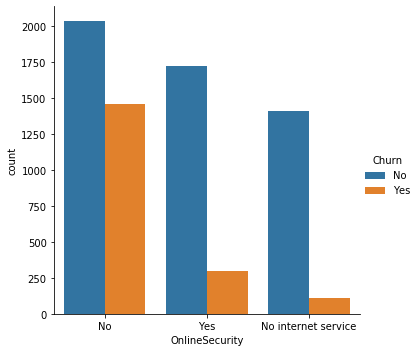

In [43]:
sns.catplot(x='OnlineSecurity', hue='Churn', kind='count', data=data)

Customers have no Online Security have lowest churn.

Customers with Online Security have lower churn than customers with no internet services.

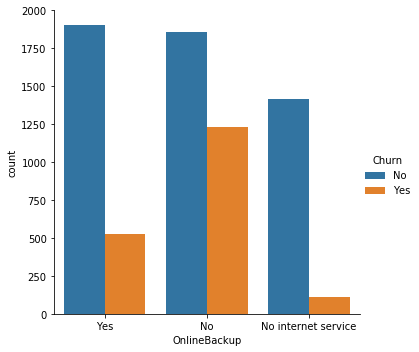

In [44]:
sns.catplot(x='OnlineBackup', hue='Churn', kind='count', data=data)

Customers who keep Online backup of data have lowest churn rate.

Customers who do not Online  backup of data have lower churn rate than customers with no internet services.

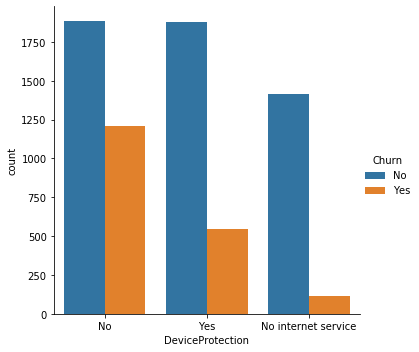

In [45]:
sns.catplot(x='DeviceProtection', hue='Churn', kind='count', data=data)

Either with Device Protection or not max churn is no in both cases.

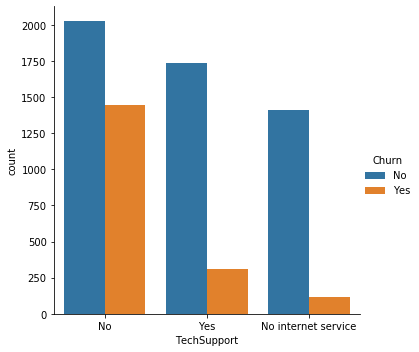

In [46]:
sns.catplot(x='TechSupport', hue='Churn', kind='count', data=data)

Customers with no tech support have lower churn rate than customers with no internet services.

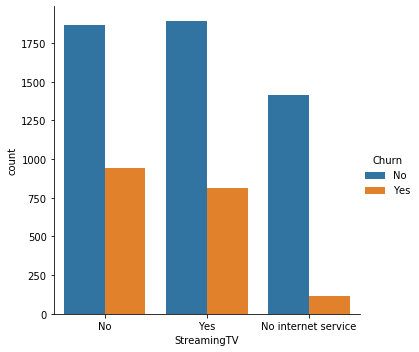

In [47]:
sns.catplot(x='StreamingTV', hue='Churn', kind='count', data=data)

Either with StreamingTV or not max churn is no in both cases alomost.

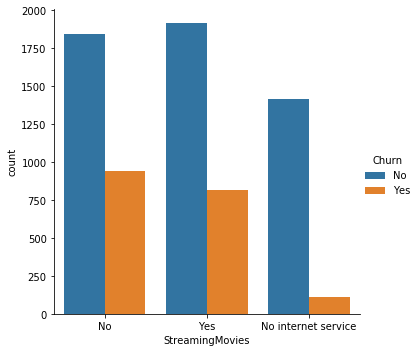

In [48]:
sns.catplot(x='StreamingMovies', hue='Churn', kind='count', data=data)

Either with StreamingMovies or not max churn is no in both cases alomost.

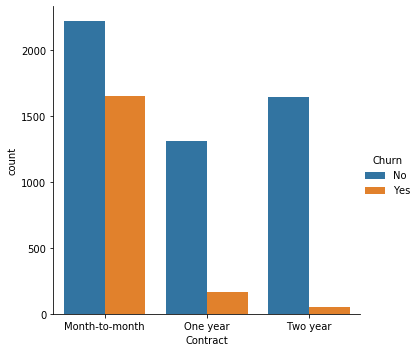

In [49]:
sns.catplot(x='Contract', hue='Churn', kind='count', data=data)

Customers with month to month contract have low chances of churn rate.

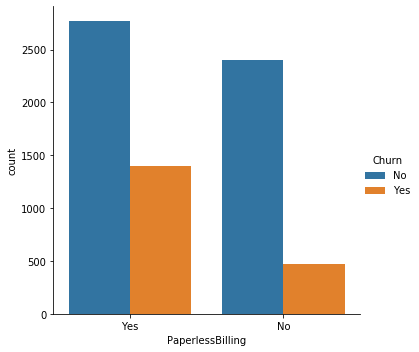

In [50]:
sns.catplot(x='PaperlessBilling', hue='Churn', kind='count', data=data)

Customers with paperless billing have low chance of churn rate.

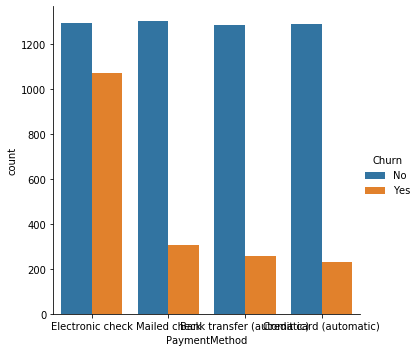

In [51]:
sns.catplot(x='PaymentMethod', hue='Churn', kind='count', data=data)

Customer with electronic check have high chances of the churn.

In [52]:
# Dropping the column, 'customerID'
data.drop('customerID', axis=1, inplace=True)

## Label Encoding

In [53]:
df_str=[]
for i in  data.columns:
    if data[i].dtypes == "object":
        df_str.append(i)

In [54]:
df_str

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [55]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in df_str:
    data[i]=LE.fit_transform(data[i])
    print(data[i].value_counts())

1    3555
0    3488
Name: gender, dtype: int64
0    3641
1    3402
Name: Partner, dtype: int64
0    4933
1    2110
Name: Dependents, dtype: int64
1    6361
0     682
Name: PhoneService, dtype: int64
0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64
1    3096
0    2421
2    1526
Name: InternetService, dtype: int64
0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64
0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64
0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64
0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64
0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64
0    2785
2    2732
1    1526
Name: StreamingMovies, dtype: int64
0    3875
2    1695
1    1473
Name: Contract, dtype: int64
1    4171
0    2872
Name: PaperlessBilling, dtype: int64
2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64
0    5174
1    1869
Name: Churn, dtype: int64


## Correlation

In [56]:
corr = data.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


## Multivariate Analysis

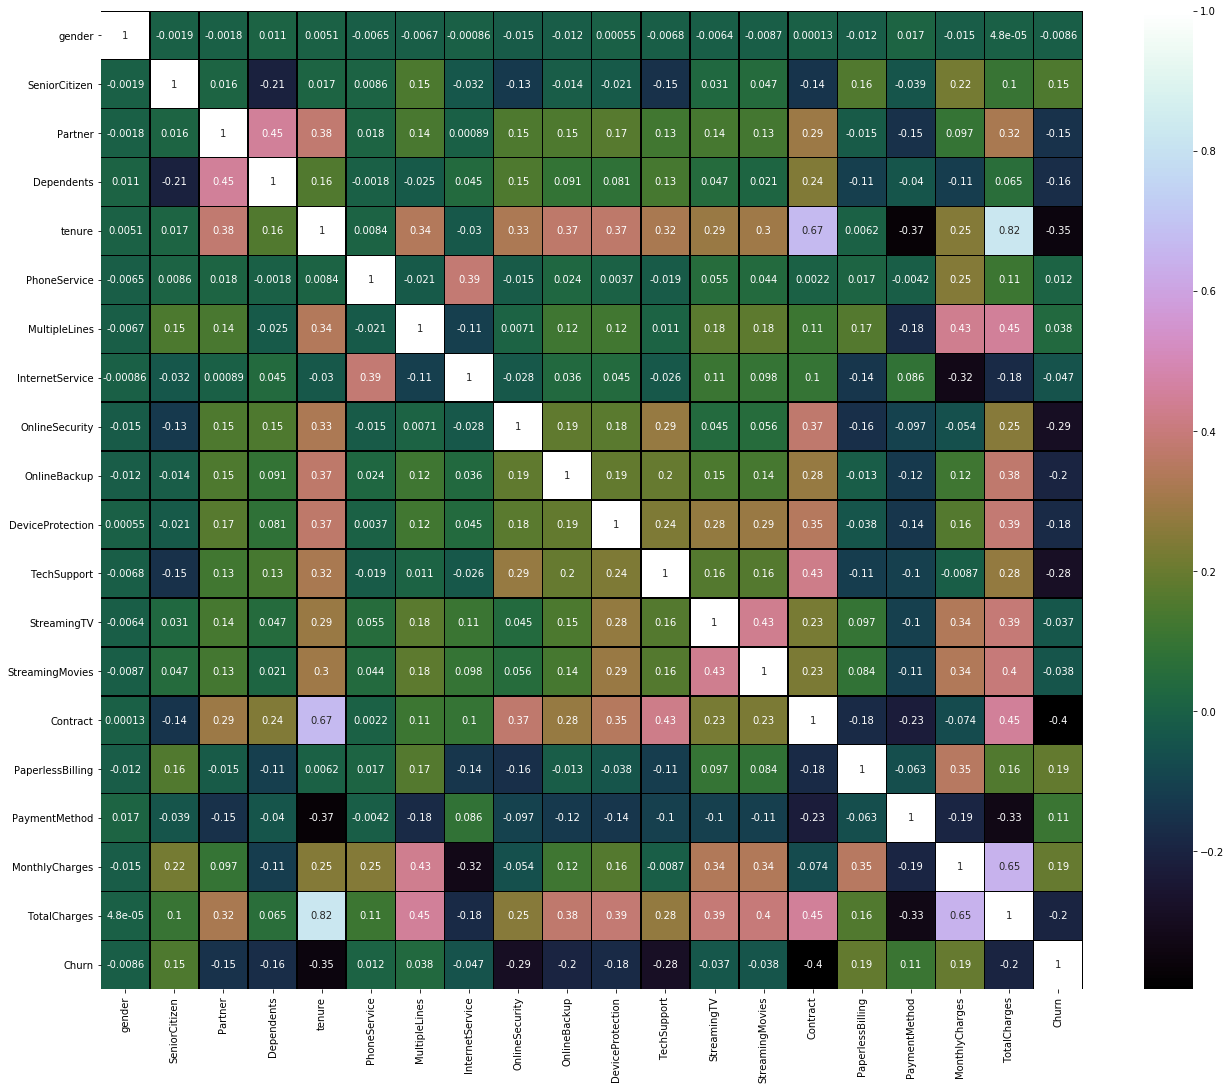

In [57]:
plt.figure(figsize=(22, 18))
sns.heatmap(corr, cmap='cubehelix', linewidth=0.5, linecolor='black', annot=True)
plt.show()

Observations:
    
(1). Churn is highly positively correlated with PaperlessBilling.

(2). Contract is highly positively correlated with tenure.

(3). PaperlessBilling is highly negatively correlated with Contract.

(4). Contract is highly negatively correlated with Churn.

## Checking for Outliers

gender                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
SeniorCitizen        AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Partner               AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Dependents           AxesSubplot(0.606034,0.71587;0.133621x0.16413)
tenure               AxesSubplot(0.766379,0.71587;0.133621x0.16413)
PhoneService           AxesSubplot(0.125,0.518913;0.133621x0.16413)
MultipleLines       AxesSubplot(0.285345,0.518913;0.133621x0.16413)
InternetService      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
OnlineSecurity      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
OnlineBackup        AxesSubplot(0.766379,0.518913;0.133621x0.16413)
DeviceProtection       AxesSubplot(0.125,0.321957;0.133621x0.16413)
TechSupport         AxesSubplot(0.285345,0.321957;0.133621x0.16413)
StreamingTV          AxesSubplot(0.44569,0.321957;0.133621x0.16413)
StreamingMovies     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Contract            AxesSubplot(0.766379,0.32195

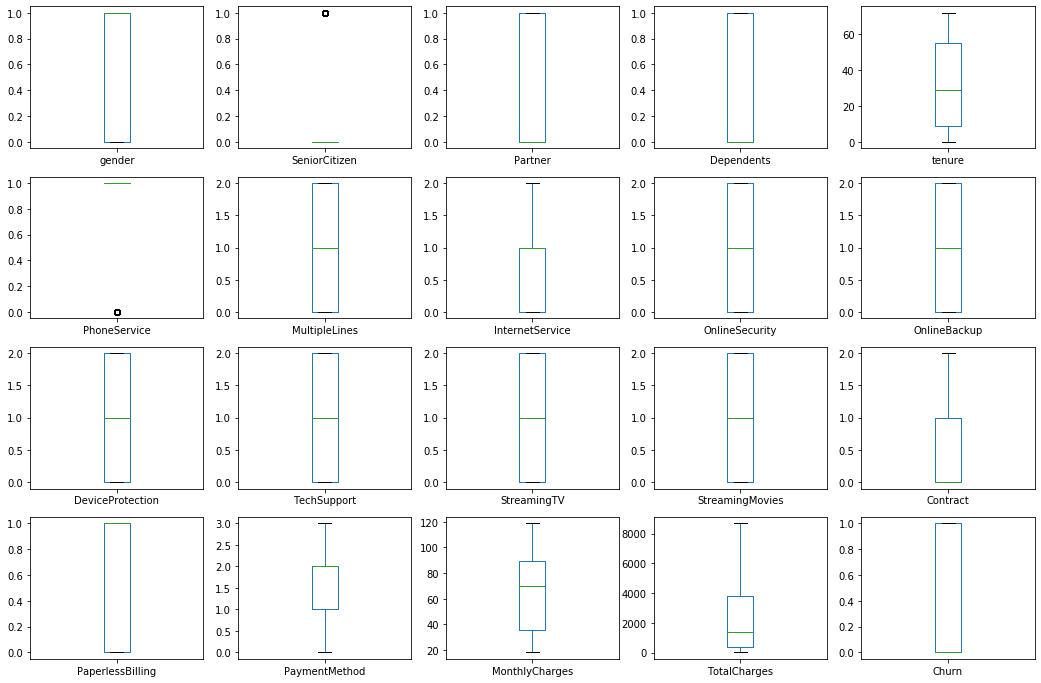

In [58]:
data.plot(kind='box', subplots=True, layout=(4,5), sharex=False, fontsize=10, figsize=(18, 12))

Observation:
    
SeniorCitizen and PhoneService columns having Outliers.

## Removing Outliers

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(data))

In [60]:
threshold=3
df=data[(z<3).all(axis=1)]

In [61]:
data.shape

(7043, 20)

In [62]:
df.shape

(6361, 20)

In [63]:
# Data loss
Data_loss = ((7043-6361)/7043)*100
Data_loss

9.683373562402386

NOTE: Outliers are not removed since dataloss is morethan 7%.

## Splitting x and y variable

In [64]:
x = data.drop('Churn', axis=1)
y = data['Churn']
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


## Checking skewness

In [65]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64

There is skewness present in TotalCharges column, we will neglect other column skewness level as other columns are categorical columns.

In [66]:
x['TotalCharges']=np.sqrt(x['TotalCharges'])

In [67]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.307849
dtype: float64

skewness removed from all the column.

## Scaling the data

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.449636
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.100180
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.248349
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.077163
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.170252


Scaled the date

## Handle the class imbalance

In [69]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [71]:
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [72]:
print(x.shape)
print(y.shape)

(10348, 19)
(10348,)


## Trainig and testing of model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [74]:
# Creating train test split using best random state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

In [75]:
# Importing various classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Initializing the instance of the model
Lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [77]:
models = []
models.append(('LogisticRegression',Lr))
models.append(('GaussianNB',gnb))
models.append(('SupportVectorClassifier',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [78]:
#Importing required modules
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

---------------------------- LogisticRegression ------------------------------


LogisticRegression()


accuracy_score:  0.785024154589372


cross_val_score:  0.7714557897464995


roc_auc_score:  0.7847691332354213


Classification report: 

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1021
           1       0.78      0.80      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.79      0.78      2070

Confusion matrix: 

[[782 239]
 [206 843]]


AUC_ROC Curve:



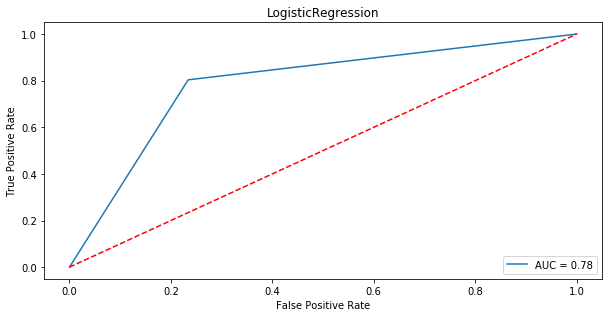

---------------------------- GaussianNB ------------------------------


GaussianNB()


accuracy_score:  0.7647342995169082


cross_val_score:  0.7612123759290002


roc_auc_score:  0.7644102073800056


Classification report: 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1021
           1       0.76      0.79      0.77      1049

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070

Confusion matrix: 

[[756 265]
 [222 827]]


AUC_ROC Curve:



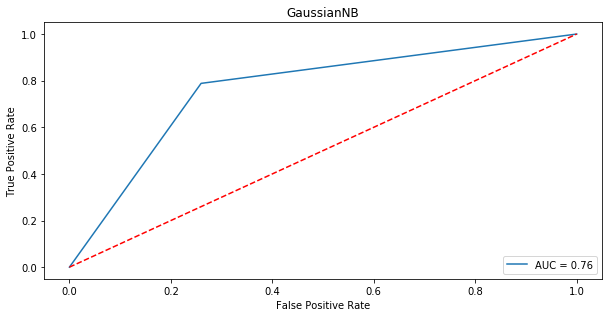

---------------------------- SupportVectorClassifier ------------------------------


SVC()


accuracy_score:  0.8222222222222222


cross_val_score:  0.8053781728436571


roc_auc_score:  0.8217452561975447


Classification report: 

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1021
           1       0.80      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

Confusion matrix: 

[[803 218]
 [150 899]]


AUC_ROC Curve:



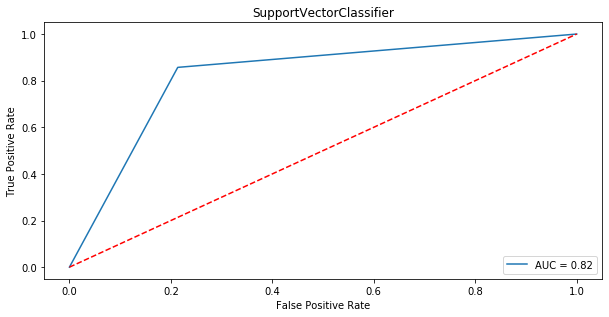

---------------------------- DecisionTreeClassifier ------------------------------


DecisionTreeClassifier()


accuracy_score:  0.7874396135265701


cross_val_score:  0.7833472260164424


roc_auc_score:  0.787374571556886


Classification report: 

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1021
           1       0.79      0.79      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Confusion matrix: 

[[799 222]
 [218 831]]


AUC_ROC Curve:



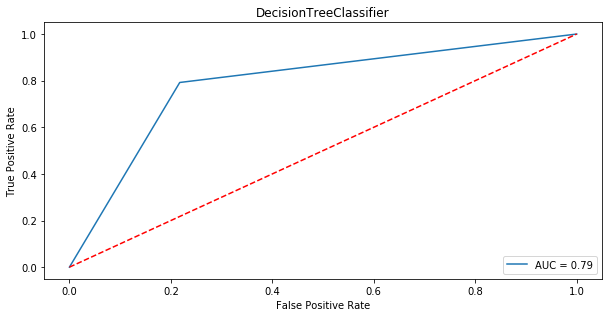

---------------------------- KNeighborsClassifier ------------------------------


KNeighborsClassifier()


accuracy_score:  0.8057971014492754


cross_val_score:  0.7919428975700646


roc_auc_score:  0.8043759786149582


Classification report: 

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1021
           1       0.76      0.91      0.83      1049

    accuracy                           0.81      2070
   macro avg       0.82      0.80      0.80      2070
weighted avg       0.82      0.81      0.80      2070

Confusion matrix: 

[[714 307]
 [ 95 954]]


AUC_ROC Curve:



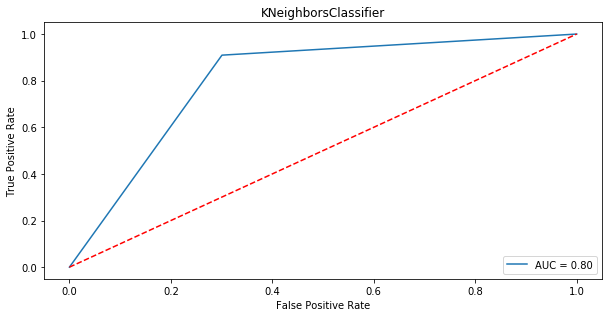

In [79]:
Model = []
Score = []
CV_Score = []
ROC_Score = []

for name, model in models:
    print('----------------------------',name,'------------------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=accuracy_score(y_test, pre)
    print('accuracy_score: ', AS)
    Score.append(AS*100)
    print('\n')
    
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ', cvs)
    CV_Score.append(cvs*100)
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, pre)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score: ', roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
   
    print('Classification report: \n')
    print(classification_report(y_test, pre))
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test, pre)
    print(cm)
    print('\n')
    
    plt.figure(figsize=(10, 50))
    plt.subplot(912)
    print('AUC_ROC Curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [80]:
# Result store in DataFrame
Result = pd.DataFrame({'Model':Model, 'Accuracy Score':Score, 'CV Score':CV_Score, 'ROC AUC Score':ROC_Score})
Result

,Model,Accuracy Score,CV Score,ROC AUC Score
0,LogisticRegression,78.502415,77.145579,78.476913
1,GaussianNB,76.473430,76.121238,76.441021
2,SupportVectorClassifier,82.222222,80.537817,82.174526
3,DecisionTreeClassifier,78.743961,78.334723,78.737457
4,KNeighborsClassifier,80.579710,79.194290,80.437598


From the above algorithms, we can say that the SupportVectorClassifier is working well by giving an accuracy of 82.22% and cross validation score of 80.53%

## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train, y_train)
print('Test accuracy:{}%'.format(round(RFC.score(x_test, y_test)*100, 2)))

Test accuracy:85.51%


In [83]:
pred_RFC = RFC.predict(x_test)

In [84]:
print(confusion_matrix(y_test, pred_RFC))

[[873 148]
 [152 897]]


In [85]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



## Cross validation for Random Forest Classifier

In [86]:
RFC_cv = cross_val_score(RandomForestClassifier(), x, y, cv=5)
print(RFC_cv)
print(RFC_cv.mean()*100, RFC_cv.std())

[0.77391304 0.79951691 0.89130435 0.89656839 0.90188497]
85.26375317255179 0.05453384041435106


Random Forest Classifier is working well by giving an accuracy of 85.51% and cross validation score of 77.39%. Now we will improve accuracy by Hypereparameter tuning.

## Hyperparameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=353)   
parameters={'n_estimators':[10,50,100,500,1000,1200],'criterion' :['gini', 'entropy']}
grid=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_params_)   
print(grid.best_score_)  

{'criterion': 'entropy', 'n_estimators': 500}
0.848997621028358


In [91]:
#Using the best parameters obtained
RF=RandomForestClassifier(random_state=353,criterion='entropy',n_estimators=500)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  86.13526570048309
Cross validation score:  85.6502266025035


Accuracy of Random Forest Classifier after hyperparameter tuning is 86.13% and cross validation score is 85.65%.   

## Saving the model

In [93]:
import joblib
joblib.dump(RF, 'Customer_churn.pkl')

['Customer_churn.pkl']